In [6]:
from common import helpers, func_helpers
import skimage
import numpy as np
import matplotlib.pyplot as plt
from toolz.sandbox.core import unzip




raw_files = (
    #r'D:\CZI_scope\code\data\raw\recording_2023-10-11_15-04-58.raw',
    r'D:\CZI_scope\code\data\raw\recording_2023-10-16_21-01-18_lin_test_10.raw',
)
event_iterators = (helpers.load_evts_from_file(raw_file) for raw_file in raw_files)
imgs = [helpers.evts_to_img(event_iterator, integrate=True, start_ts=0, dt=3e3) for event_iterator in event_iterators]
neg_imgs = [img[0] for img in imgs]
pos_imgs = [img [1] for img in imgs]
# combine the images




<Figure size 2000x2000 with 0 Axes>

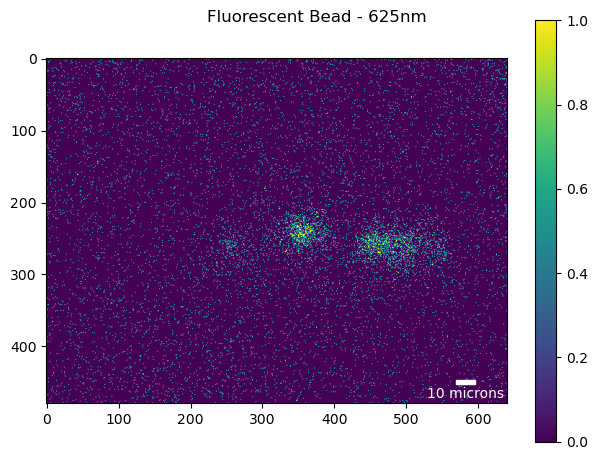

In [8]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
# Parameters for the scale bar
microns_per_pixel = 15 / 39 # 15 microns per pixel, divided by magnification factor (39x)
bar_length_microns = 10  # in microns
bar_length_pixels = bar_length_microns / microns_per_pixel  # in image pixels
bar_label = '10 microns'
bar_color = 'white'
bar_location = 'lower right'  # other options: 'upper right', 'lower left', 'upper left'
bar_height_fraction = 0.01   # Height of bar as fraction of the image size



plt.figure(figsize=(20, 20))
fig, axs, imgs = helpers.gen_image_plot(*neg_imgs, vmin=0, vmax=1, colorbar=True)
plt.colorbar(imgs[-1], ax=axs)
fig.suptitle('Fluorescent Bead - 625nm')



for ax, img in zip(axs, combined_imgs):

    scalebar = AnchoredSizeBar(ax.transData,
                            bar_length_pixels,
                            bar_label,
                            bar_location,
                            pad=0.1,
                            color=bar_color,
                            frameon=False,
                            size_vertical=img.shape[0] * bar_height_fraction)
    ax.add_artist(scalebar)

plt.show()


In [ ]:
# print the pearson correlation coefficient

if img.size > img1.size:
    padded_img = helpers.pad_image(img1, img.shape)
    pearson = np.corrcoef(img.flatten(), padded_img.flatten())[0, 1]
elif img.size < img1.size:
    padded_img = helpers.pad_image(img, img1.shape)
    pearson = np.corrcoef(img1.flatten(), padded_img.flatten())[0, 1]
else:
    pearson = np.corrcoef(img.flatten(), img1.flatten())[0, 1]

print('Pearson correlation coefficient: {}'.format(pearson))

Pearson correlation coefficient: 0.03452682496118596
